#                                MOVIE RATING PREDICTION 

# Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Loading Dataset 

In [49]:
data= pd.read_csv('IMDb Movies India.csv', encoding = 'latin-1')
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


# Data Cleaning 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [4]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [5]:
data.describe(include = 'all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [6]:
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [7]:
# Removing Unwanted columns

data = data.drop(columns = ['Name', 'Year', 'Duration'], axis = 1)

In [8]:
data.head(15)

,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [9]:
# Genre contains so many values at each row. so, creating dummy columns for each genres 

data['Genre'] = data['Genre'].str.split(', ')
data = data.explode(column = 'Genre')

In [10]:
data.shape

(24950, 7)

In [11]:
# Converting the uppercase string into Lowercase

data['Genre'] = data['Genre'].str.lower()
data['Actor 1'] = data['Actor 1'].str.lower()
data['Actor 2'] = data['Actor 2'].str.lower()
data['Actor 3'] = data['Actor 3'].str.lower()
data['Director'] = data['Director'].str.lower()

In [12]:
# calculating the number of null values

data.isna().sum()

Genre       1877
Rating      9113
Votes       9112
Director     542
Actor 1     1783
Actor 2     2673
Actor 3     3525
dtype: int64

In [13]:
data['Votes'] = data['Votes'].str.replace(',','')

data['Votes'].mode()

0    8
Name: Votes, dtype: object

In [14]:
# replacing null values with mode
data['Votes'].fillna('8', inplace= True)

In [15]:
row = data[data['Votes']=="$5.16M"]
data.drop(row.index, inplace = True)

In [16]:
# converting object datatype to numeric
data['Votes'] = pd.to_numeric(data['Votes'])

In [17]:
# calculating the number of null values in Rating column
data['Rating'].isna().sum()

9112

In [18]:
# Replacing null values with mean value
mean =data['Rating'].mean()
data['Rating'].fillna(mean, inplace = True)

In [19]:
# Replacing null values with mode
data['Genre'].fillna(data['Genre'].mode()[0], inplace = True)
data['Director'].fillna(data['Director'].mode()[0], inplace = True)
data['Actor 1'].fillna(data['Actor 1'].mode()[0], inplace = True)
data['Actor 2'].fillna(data['Actor 2'].mode()[0], inplace = True)
data['Actor 3'].fillna(data['Actor 3'].mode()[0], inplace = True)

In [21]:
data.columns

Index(['Genre', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2',
       'Actor 3'],
      dtype='object')

# Analysing The Data 

<AxesSubplot:xlabel='Year', ylabel='Rating'>

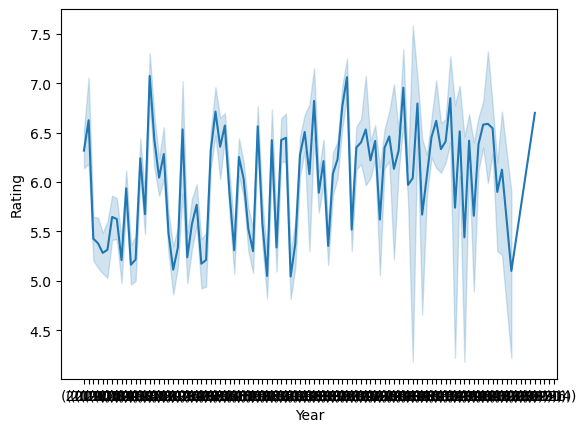

In [33]:
sns.lineplot(data = data, x = 'Year', y ='Rating')

<AxesSubplot:>

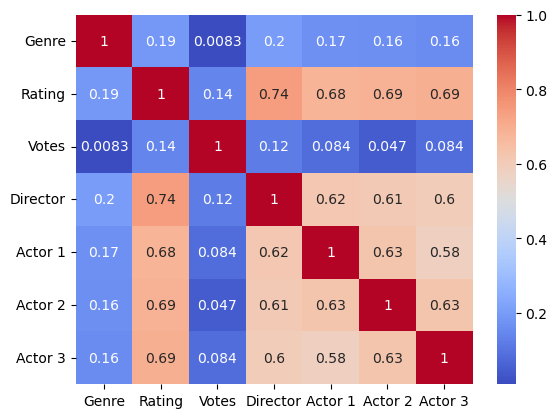

In [42]:
corr_mat = data_1.corr()

sns.heatmap(corr_mat, cmap = 'coolwarm', annot = True)

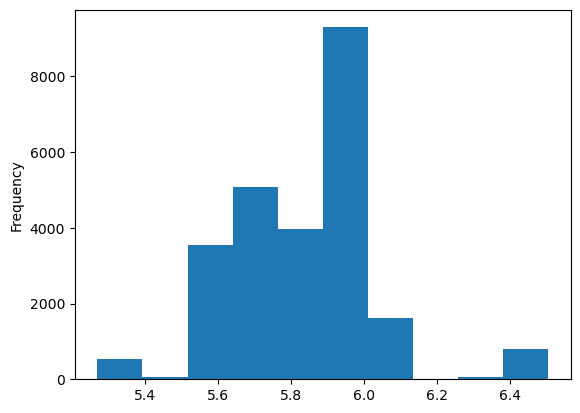

In [54]:
fig = data['Genre'].plot(kind = 'hist')

# Data Preprocessing 

In [40]:
# Grouping the columns with their average rating and then creating a new feature

genre_mean_rating = data.groupby('Genre')['Rating'].transform('mean')
data['Genre'] = genre_mean_rating

director_mean_rating = data.groupby('Director')['Rating'].transform('mean')
data['Director'] = director_mean_rating

actor1_mean_rating = data.groupby('Actor 1')['Rating'].transform('mean')
data['Actor 1'] = actor1_mean_rating

actor2_mean_rating = data.groupby('Actor 2')['Rating'].transform('mean')
data['Actor 2'] = actor2_mean_rating

actor3_mean_rating = data.groupby('Actor 3')['Rating'].transform('mean')
data['Actor 3'] = actor3_mean_rating

In [55]:
data.head()

,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,5.920306,5.824228,8,5.762114,5.824228,5.589481,5.824228
1,5.920306,7.000000,8,7.000000,6.850000,7.000000,7.000000
2,5.920306,5.824228,8,5.824228,6.294537,6.587114,5.824228
2,6.105271,5.824228,8,5.824228,6.294537,6.587114,5.824228
3,5.755252,4.400000,35,4.400000,5.250000,4.400000,4.460000


In [56]:
data.isna().sum()

Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24949 entries, 0 to 15508
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Genre     24949 non-null  float64
 1   Rating    24949 non-null  float64
 2   Votes     24949 non-null  int64  
 3   Director  24949 non-null  float64
 4   Actor 1   24949 non-null  float64
 5   Actor 2   24949 non-null  float64
 6   Actor 3   24949 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.0 MB


# Train Test Split 

In [59]:
x = data.drop(columns = ['Genre', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], axis = 1)
y = data['Rating']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)

# Model Selection 

## Linear Regression 

In [61]:
lr_model = LinearRegression()

lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

print('R2 Score :',r2_score(y_test, y_pred))
print('Mean squared error : ', mean_squared_error(y_test, y_pred))
print('Mean absolute error : ', mean_absolute_error(y_test, y_pred))

R2 Score : 1.0
Mean squared error :  1.1275984102763453e-28
Mean absolute error :  6.922570584754256e-15


## Random Forest Regressor 

In [62]:
rfr_model = RandomForestRegressor()
rfr_model.fit(x_train, y_train)
y_pred = rfr_model.predict(x_test)

print('R2 Score :',r2_score(y_test, y_pred))
print('Mean squared error : ', mean_squared_error(y_test, y_pred))
print('Mean absolute error : ', mean_absolute_error(y_test, y_pred))

R2 Score : 0.9999988161645829
Mean squared error :  1.395591182364576e-06
Mean absolute error :  2.0040080257187345e-05


## Support Vector Regressor 

In [63]:
svr_model = SVR()
svr_model.fit(x_train, y_train)
y_pred = svr_model.predict(x_test)

print('R2 Score :',r2_score(y_test, y_pred))
print('Mean squared error : ', mean_squared_error(y_test, y_pred))
print('Mean absolute error : ', mean_absolute_error(y_test, y_pred))

R2 Score : 0.9951957611910259
Mean squared error :  0.005663585683299227
Mean absolute error :  0.06996727719369004


# MODEL

### ** Based on the analysis Support vector has been choosen as a model for credit card fraud detection **


### SUPPORT VECTOR MACHINE (REGRESSOR)

* R2 Score = 0.9951957611910259
* Mean squared error =  0.005663585683299227
* Mean absolute error =  0.06996727719369004

# THANK YOU 